In [42]:
import datetime
import pandas as pd
import numpy as np
colors = ['#33CCFF', '#009933', '#0099CC', '#CC0099', '#FFFF33','#6699FF', '#0099FF','#000000']
df = pd.read_csv("statement3.csv")

In [43]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px solid gray;
    text-align:left;
}

In [44]:
jc = df[(df['Description'] == 'Joined A Contest')]
jccnt = sum(jc['Amount'])

wc = df[(df['Description'] == 'Won A Contest')]
wccnt = sum(wc['Amount'])

wdr = df[(df['Description'] == 'Withdrew Cash')]
wdrs = sum(wdr['Amount'])

dc = df[(df['Description'] == 'Deposited Cash')]
dccnt = sum(dc['Amount'])

pending = (dccnt - wdrs)
loss = (jccnt-wccnt)
balance = 13
print("Total Joined:",jccnt," Total Won:",wccnt," Total Deposit:", dccnt," Withdraw Cash:",wdrs, " Pending:",pending)
data = {
    'Description': ['Total Joined','Total Won','Total Deposit','Withdraw Cash','Pending'],    
    'Amount': [jccnt,wccnt,dccnt,wdrs,pending]
}
dff = pd.DataFrame({
                    'Description': ['Total Joined','Total Won','Total Deposit','Withdraw Cash','Loss','Balance','Pending'], 
                    'Amount': [jccnt,wccnt,dccnt,wdrs,loss,balance,pending]
                    },
                    index=['Joined','Won','Deposit','Withdraw','Loss','Balance','Pending'])
dff

Total Joined: 4399  Total Won: 2801  Total Deposit: 1811  Withdraw Cash: 200  Pending: 1611


,Description,Amount
Joined,Total Joined,4399
Won,Total Won,2801
Deposit,Total Deposit,1811
Withdraw,Withdraw Cash,200
Loss,Loss,1598
Balance,Balance,13
Pending,Pending,1611


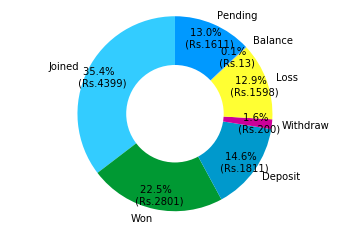

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
labels = 'Joined','Won','Deposit','Withdraw','Loss','Balance','Pending'
sizes =  [jccnt,wccnt,dccnt,wdrs,loss,balance,pending]
explode = (0.05,0.05,0.05,0.05,0.05)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% \n (Rs.{v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, pctdistance=0.85,  labels=labels, autopct=make_autopct(sizes),
        shadow=False,startangle=90)

plt.savefig('foo.png')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.show()

In [31]:
df3 = dff.T
df3

,Joined,Won,Deposit,Withdraw,Loss,Balance,Pending
Description,Total Joined,Total Won,Total Deposit,Withdraw Cash,Loss,Balance,Pending
Amount,4399,2801,1811,200,1598,13,1611


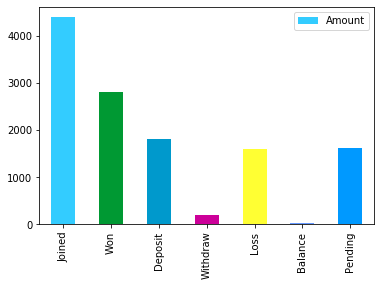

In [32]:
df2 = dff.plot.bar(y='Amount',color=colors)
df2

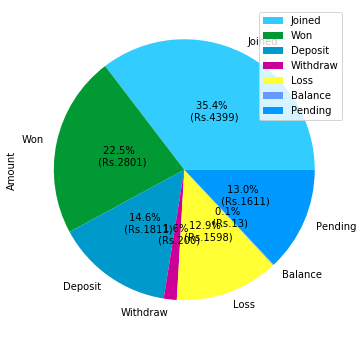

In [33]:
Amount= dff['Amount']
df2 = dff.plot.pie(y='Amount',pctdistance=0.5,colors=colors, autopct=make_autopct(Amount),figsize=(10, 6))
df2 

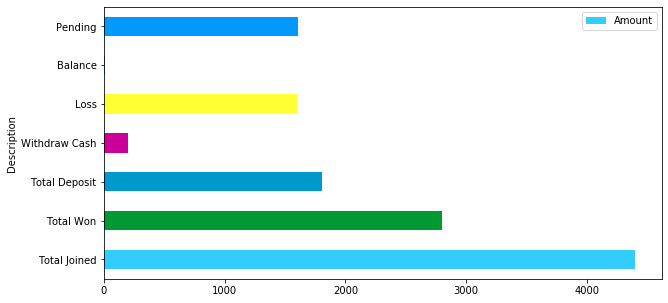

In [34]:
df2 = dff.plot.barh(x="Description",y='Amount',color=colors,figsize=(10, 5))
df2 

In [39]:
d1 = df[(df['Round'] == 'Semi-Final-2')]
j = d1[(d1['Description'] =='Joined A Contest')]
join = sum(j['Amount'])
w = d1[(d1['Description'] =='Won A Contest')]
won = sum(w['Amount'])
profit = won - join
if profit < 0:
    profit = 0
else:
    profit = profit
loss = join - won
wondf = pd.DataFrame({
                    'Description': ['Joined','Won','Profit','Loss'], 
                    'Amount': [join,won,profit,loss]
                    },
                    index=['Joined','Won','Profit','Loss'])
wondf

,Description,Amount
Joined,Joined,378
Won,Won,0
Profit,Profit,0
Loss,Loss,378


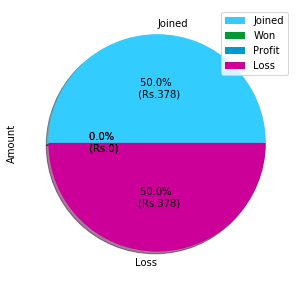

In [40]:
Amount= wondf['Amount']
df3 = wondf.plot.pie(x='Description',y='Amount',shadow=True,pctdistance=0.5,colors=colors,autopct=make_autopct(Amount),figsize=(8, 5))
df3 

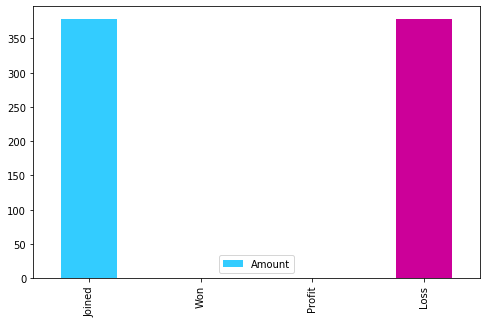

In [41]:
df3 = wondf.plot.bar(y='Amount',color=colors, figsize=(8, 5))
df3 